In [1]:
!pip3 install tweepy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 678.7 kB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [2]:
import tweepy
import numpy as np
import pandas as pd

In [3]:
#Chave
bearer_token = "AAAAAAAAAAAAAAAAAAAAAGJrlgEAAAAAbwqHxRmdRHG1qqeZTzx7OrESAig%3D4QiKcBbjpuEmOXMRala40QU0D2QSEWEPIVyIRKcjlG29JDgACA"

client = tweepy.Client(bearer_token=bearer_token)

In [4]:
response = client.search_recent_tweets("saquarema", max_results=100)

In [5]:
print(response.meta)

{'newest_id': '1631751677559668743', 'oldest_id': '1631341004128231458', 'result_count': 98, 'next_token': 'b26v89c19zqg8o3fqk9zbevplj6vdn2h008ixaure59bx'}


In [6]:
tweets = response.data

In [7]:
type(tweets)

list

In [ ]:
#for tweet in tweets:
 #   print(tweet)
   # print(tweet.text)
    #print(tweet.)
    #print(tweet.

In [8]:
results = []
resultid = []
resulttext = []

In [9]:
type(results)

list

In [14]:
for tweet in tweepy.Paginator(client.search_recent_tweets, query='saquarema', 
                              max_results=100).flatten(limit=1000):
    #print(tweet.text)
    resultid.append(tweet.id)
    resulttext.append(tweet.text)
 

In [13]:
#results.clear()
#resultid.clear()
#resulttext.clear()


In [15]:
df = pd.DataFrame(results)

In [16]:
df2 = pd.DataFrame(columns=['created_at', 'text'])

In [17]:
count = 0
for tweet in tweepy.Paginator(client.search_recent_tweets, query='saquarema', 
                              max_results=100).flatten(limit=10000):

#  hashtags_list = ["","",""]
#  user_mentions_list = ["","",""]

#  if len(tweet.entities["hashtags"]) != 0:
#    for i, item in enumerate(tweet.entities["hashtags"]):
#      hashtags_list[i] = item["text"]
#      if i == 2:
#        break
  
#  if len(tweet.entities["user_mentions"]) != 0:
#    for i, item in enumerate(tweet.entities["user_mentions"]):
#      user_mentions_list[i] = item["screen_name"]
#      if i == 2:
#        break

  df2.loc[count] = [tweet.id]+[tweet.text]
  
  count += 1

In [18]:
df2

,created_at,text
0,1631751677559668743,@__zrangelz @Bronzana1 OH MY GOD ITS RANGEL FR...
1,1631741042872446979,"Saquarema, Lugar de ser feliz e amar #saquarema"
2,1631736020059160576,meu pai roncava tão alto mas tão tão alto que ...
3,1631734455462232067,"@__zrangelz @Elder_RockLee NÃOOOOO, eu te acho..."
4,1631730705259720704,dar um pulo ali em saquarema
...,...,...
743,1629226003284254721,vou ficar em Saquarema até segunda graças a De...
744,1629224580605771786,RT @thaissa_ss: Marlon veio cmg de Saquarema p...
745,1629223019624161281,tá gostosin aqui em Saquarema
746,1629222117265776641,Jurei que ia sair de Saquarema com a marquinha...


In [19]:
!pip install nltk
import nltk
#nltk.download()  <-- Run this if it's your first time using nltk to download all of the datasets and models

import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
df2.head()

,created_at,text
0,1631751677559668743,@__zrangelz @Bronzana1 OH MY GOD ITS RANGEL FR...
1,1631741042872446979,"Saquarema, Lugar de ser feliz e amar #saquarema"
2,1631736020059160576,meu pai roncava tão alto mas tão tão alto que ...
3,1631734455462232067,"@__zrangelz @Elder_RockLee NÃOOOOO, eu te acho..."
4,1631730705259720704,dar um pulo ali em saquarema


In [22]:
df2.iloc[4]

created_at             1631730705259720704
text          dar um pulo ali em saquarema
Name: 4, dtype: object

In [25]:
df2.iloc[1,1]

'Saquarema, Lugar de ser feliz e amar #saquarema'

In [27]:
import re

In [31]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas
lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
df2['text'] = df2.text.map(lower_alpha)

In [32]:
df2.head()

,created_at,text
0,1631751677559668743,@__zrangelz @ oh my god its rangel from saqua...
1,1631741042872446979,"saquarema, lugar de ser feliz e amar #saquarema"
2,1631736020059160576,meu pai roncava tão alto mas tão tão alto que ...
3,1631734455462232067,"@__zrangelz @elder_rocklee nãooooo, eu te acho..."
4,1631730705259720704,dar um pulo ali em saquarema


In [33]:
# Essa expressão regular remove toda a pontuação
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
df2['text'] = df2.text.map(punc_re)

df2.head()

,created_at,text
0,1631751677559668743,zrangelz oh my god its rangel from saqua...
1,1631741042872446979,saquarema lugar de ser feliz e amar saquarema
2,1631736020059160576,meu pai roncava tão alto mas tão tão alto que ...
3,1631734455462232067,zrangelz elder rocklee nãooooo eu te acho...
4,1631730705259720704,dar um pulo ali em saquarema


In [35]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df2['tokens'] = df2.text.map(word_tokenize)
df2.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,created_at,text,tokens
0,1631751677559668743,zrangelz oh my god its rangel from saqua...,"[zrangelz, oh, my, god, its, rangel, from, saq..."
1,1631741042872446979,saquarema lugar de ser feliz e amar saquarema,"[saquarema, lugar, de, ser, feliz, e, amar, sa..."
2,1631736020059160576,meu pai roncava tão alto mas tão tão alto que ...,"[meu, pai, roncava, tão, alto, mas, tão, tão, ..."
3,1631734455462232067,zrangelz elder rocklee nãooooo eu te acho...,"[zrangelz, elder, rocklee, nãooooo, eu, te, ac..."
4,1631730705259720704,dar um pulo ali em saquarema,"[dar, um, pulo, ali, em, saquarema]"


In [36]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(df2.tokens.tolist(), [])

word_list[:10]

['zrangelz',
 'oh',
 'my',
 'god',
 'its',
 'rangel',
 'from',
 'saquarema',
 'oh',
 'my']

In [37]:
# Estas são as etapas para encontrar as palavras mais comuns

from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(764, 'saquarema'),
 (562, 'de'),
 (360, 'em'),
 (321, 'e'),
 (220, 'a'),
 (204, 'que'),
 (199, 't'),
 (198, 'co'),
 (197, 'https'),
 (181, 'o')]

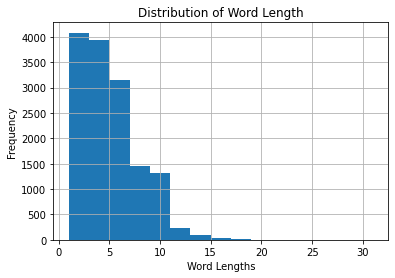

In [39]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

In [40]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('portuguese')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
df2['tokens_stop'] = df2.tokens.apply(stop_lambda)
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,created_at,text,tokens,tokens_stop
0,1631751677559668743,zrangelz oh my god its rangel from saqua...,"[zrangelz, oh, my, god, its, rangel, from, saq...","[zrangelz, oh, my, god, its, rangel, from, saq..."
1,1631741042872446979,saquarema lugar de ser feliz e amar saquarema,"[saquarema, lugar, de, ser, feliz, e, amar, sa...","[saquarema, lugar, feliz, amar, saquarema]"
2,1631736020059160576,meu pai roncava tão alto mas tão tão alto que ...,"[meu, pai, roncava, tão, alto, mas, tão, tão, ...","[pai, roncava, tão, alto, tão, tão, alto, gent..."
3,1631734455462232067,zrangelz elder rocklee nãooooo eu te acho...,"[zrangelz, elder, rocklee, nãooooo, eu, te, ac...","[zrangelz, elder, rocklee, nãooooo, acho, engr..."
4,1631730705259720704,dar um pulo ali em saquarema,"[dar, um, pulo, ali, em, saquarema]","[dar, pulo, ali, saquarema]"


In [41]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
df2['tokens_pos'] = (df2.tokens_stop.apply(pos_lambda))
df2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,created_at,text,tokens,tokens_stop,tokens_pos
0,1631751677559668743,zrangelz oh my god its rangel from saqua...,"[zrangelz, oh, my, god, its, rangel, from, saq...","[zrangelz, oh, my, god, its, rangel, from, saq...","[(zrangelz, NN), (oh, UH), (my, PRP$), (god, N..."
1,1631741042872446979,saquarema lugar de ser feliz e amar saquarema,"[saquarema, lugar, de, ser, feliz, e, amar, sa...","[saquarema, lugar, feliz, amar, saquarema]","[(saquarema, NN), (lugar, NN), (feliz, NN), (a..."
2,1631736020059160576,meu pai roncava tão alto mas tão tão alto que ...,"[meu, pai, roncava, tão, alto, mas, tão, tão, ...","[pai, roncava, tão, alto, tão, tão, alto, gent...","[(pai, NN), (roncava, NN), (tão, NN), (alto, N..."
3,1631734455462232067,zrangelz elder rocklee nãooooo eu te acho...,"[zrangelz, elder, rocklee, nãooooo, eu, te, ac...","[zrangelz, elder, rocklee, nãooooo, acho, engr...","[(zrangelz, NN), (elder, NN), (rocklee, NN), (..."
4,1631730705259720704,dar um pulo ali em saquarema,"[dar, um, pulo, ali, em, saquarema]","[dar, pulo, ali, saquarema]","[(dar, NN), (pulo, NN), (ali, NN), (saquarema,..."


In [42]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('portuguese')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

df2['tokens_stem'] = df2.tokens_stop.apply(stem_lambda)
df2.head()

,created_at,text,tokens,tokens_stop,tokens_pos,tokens_stem
0,1631751677559668743,zrangelz oh my god its rangel from saqua...,"[zrangelz, oh, my, god, its, rangel, from, saq...","[zrangelz, oh, my, god, its, rangel, from, saq...","[(zrangelz, NN), (oh, UH), (my, PRP$), (god, N...","[zrangelz, oh, my, god, its, rangel, from, saq..."
1,1631741042872446979,saquarema lugar de ser feliz e amar saquarema,"[saquarema, lugar, de, ser, feliz, e, amar, sa...","[saquarema, lugar, feliz, amar, saquarema]","[(saquarema, NN), (lugar, NN), (feliz, NN), (a...","[saquarem, lug, feliz, amar, saquarem]"
2,1631736020059160576,meu pai roncava tão alto mas tão tão alto que ...,"[meu, pai, roncava, tão, alto, mas, tão, tão, ...","[pai, roncava, tão, alto, tão, tão, alto, gent...","[(pai, NN), (roncava, NN), (tão, NN), (alto, N...","[pai, ronc, tã, alto, tã, tã, alto, gent, viaj..."
3,1631734455462232067,zrangelz elder rocklee nãooooo eu te acho...,"[zrangelz, elder, rocklee, nãooooo, eu, te, ac...","[zrangelz, elder, rocklee, nãooooo, acho, engr...","[(zrangelz, NN), (elder, NN), (rocklee, NN), (...","[zrangelz, elder, rockle, nãoooo, acho, engrac..."
4,1631730705259720704,dar um pulo ali em saquarema,"[dar, um, pulo, ali, em, saquarema]","[dar, pulo, ali, saquarema]","[(dar, NN), (pulo, NN), (ali, NN), (saquarema,...","[dar, pul, ali, saquarem]"


In [43]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(df2.tokens_stem.tolist(), [])

word_list_clean[:10]


['zrangelz',
 'oh',
 'my',
 'god',
 'its',
 'rangel',
 'from',
 'saquarem',
 'oh',
 'my']

In [45]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts_clean = Counter(word_list_clean)
a = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean[:10]

[(775, 'saquarem'),
 (337, 'pra'),
 (199, 't'),
 (198, 'co'),
 (197, 'https'),
 (76, 'rt'),
 (75, 'mrm'),
 (67, 'mor'),
 (61, 'q'),
 (56, 'gost')]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


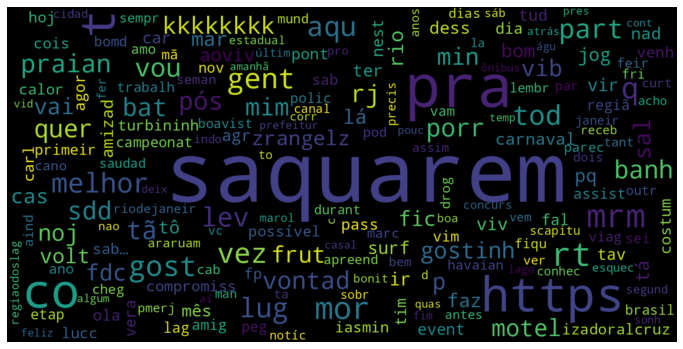

In [46]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_clean
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(df2.tokens.tolist(), [])

word_list_clean[:10]

['zrangelz',
 'oh',
 'my',
 'god',
 'its',
 'rangel',
 'from',
 'saquarema',
 'oh',
 'my']

In [49]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts_clean = Counter(word_list_clean)
a = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean[:10]

[(764, 'saquarema'),
 (562, 'de'),
 (360, 'em'),
 (321, 'e'),
 (220, 'a'),
 (204, 'que'),
 (199, 't'),
 (198, 'co'),
 (197, 'https'),
 (181, 'o')]

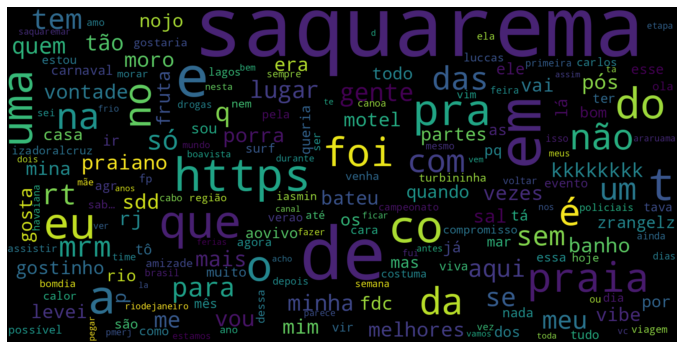

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_clean
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()